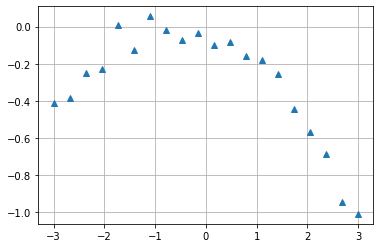

In [2]:
#学習データの生成
import numpy as np
import matplotlib.pylab as plt

#データの分布を表す関数
def distribution(x):
    return -0.09*(x+x**2)

x=np.linspace(-3.,3,20)

#関数が出力した値に変動を与える
y=distribution(x)+np.random.randn(x.size)*0.1

plt.plot(x,y,'^')
x0=np.linspace(-3,3,100)
plt.grid(True)
plt.show()

正則化定数1->100
正則化定数2->1
正則化定数3->0.1


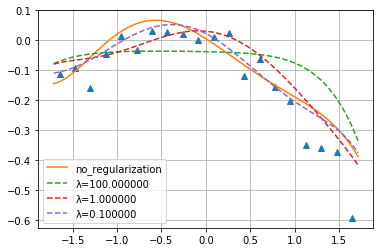

In [28]:
#正則化を適用して学習するプログラム
import numpy as np
import matplotlib.pyplot as plt

def distribution(x):
    return -0.09*(x+x**2)

def f(matrix_x,parameter):
    return np.dot(matrix_x,parameter)

def objective_f(matrix_x,y,parameter):
    return 0.5*np.sum((y-f(matrix_x,parameter))**2)

def create_matrix(x):
    return np.vstack([np.ones(x.size),x,x**2,x**3,x**4,x**5,x**6]).T

LNR=1e-4

def parameter_update(matrix_x,y):
    '''
    正則化なしで学習する
    '''
    parameter=np.random.randn(matrix_x.shape[1])
    difference=1
    
    before=objective_f(matrix_x,y,parameter)
    
    while difference>1e-6:
        parameter=parameter-LNR*np.dot(f(matrix_x,parameter)-y,matrix_x)
        after=objective_f(matrix_x,y,parameter)
        difference=before-after
        before=after
        
    return parameter

def parameter_update_regularization(matrix_x,y,reg=1):
    '''
    正則化を適用して学習する
    '''
    parameter=np.random.randn(matrix_x.shape[1])
    difference=1
    #正則化定数（ハイパーパラメータ）
    REG=reg
    
    before=objective_f(matrix_x,y,parameter)

    while difference>1e-6:
        #正則化項の計算
        reg_term=REG*np.hstack([0,parameter[1:]])#バイアス項には正則化をかけない
        parameter=parameter-LNR*(np.dot(f(matrix_x,parameter)-y,matrix_x)+reg_term)
        after=objective_f(matrix_x,y,parameter)
        difference=before-after
        before=after
        
    return parameter

def standardization(x):
    return (x-x.mean())/x.std()


###実行ブロック###
if __name__=='__main__':
    #正則化定数を入力
    REG1=float(input('正則化定数1->'))
    REG2=float(input('正則化定数2->'))
    REG3=float(input('正則化定数3->'))
    
    x=np.linspace(-2,2,20)
    
    #毎回同じ乱数を発生させる
    np.random.seed(10)
    
    #出力値にばらつきを与える
    y=distribution(x)+np.random.randn(x.size)*0.05
    
    #xの標準化
    standardized_x=standardization(x)
    matrix_x=create_matrix(x)
    
    #正則化なしで学習
    no_regularization=parameter_update(matrix_x,y)
    
    #正則化ありで学習
    do_regularization1=parameter_update_regularization(matrix_x,y,reg=REG1)
    do_regularization2=parameter_update_regularization(matrix_x,y,reg=REG2)
    do_regularization3=parameter_update_regularization(matrix_x,y,reg=REG3)
    
    x0=np.linspace(-2,2,100)
    standardized_x0=standardization(x0)
    matrix_x0=create_matrix(standardized_x0)
    
    plt.plot(standardized_x,y,'^')
    plt.plot(standardized_x0,f(matrix_x0,no_regularization),linestyle='solid',label='no_regularization')
    plt.plot(standardized_x0,f(matrix_x0,do_regularization1),linestyle='--',label='λ=%f'%REG1)
    plt.plot(standardized_x0,f(matrix_x0,do_regularization2),linestyle='--',label='λ=%f'%REG2)
    plt.plot(standardized_x0,f(matrix_x0,do_regularization3),linestyle='--',label='λ=%f'%REG3)
    
    plt.grid(True)
    plt.legend()
    plt.show()